# Homework Assignment 2

In [5]:
# Run this cell to install all required modules
!pip install numpy
!pip install matplotlib
!pip install scipy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
import numpy as np

#### Problem 2. Prediction with the k-Nearest Neighbors (k-NN) Algorithm

In [7]:
# Problem 2 (a)
from math import *
def euclidean_distance(a, B):
    """ 
    Takes two vectors and returns the Euclidean distance between them 
    Input: a - input vector a
           B - input matrix B
    Output: the Euclidean distances between vector a and rows of matrix B
    """
    row, col = B.shape
    dist = []
    for j in range(row):
        single_distance = 0;
        for i in range(a.size):
            single_distance = single_distance + ((a[i]-B[j][i]) * (a[i]-B[j][i]))
        dist.append(sqrt(single_distance))
    return dist

In [8]:
# Problem 2 (b)
def get_kneighbors(X_test, X_train, k, distance_metric=euclidean_distance):
    """
    Description: Returns the neighbors of X_test in X_train
    Input: X_test - test instances (list of instances or matrix)
           X_train - training instances (list of instances or matrix)
           k - k in kNN; #neighbors
           distance_metric - distance metric
    Output: index (array index or index in the input list) of the neighboring instances
    """
    
    """ ---- Beginning of code block (1) ---- """
    neighbors = []
    pairwise_dist = [distance_metric(x_test, X_train) for x_test in X_test]

    #print(pairwise_dist)
    """ ---- End of code block (1) ---- """
    
    """ ---- Beginning of code block (2) ---- """
    for dist in pairwise_dist:
        dist_indexed = enumerate(dist)
        dist_indexed_sorted = sorted(dist_indexed, key=lambda x: x[1])[:k]
        #print(dist_indexed_sorted)
        
        neighbors_dist = [instance[1] for instance in dist_indexed_sorted]
        neighbors_index = [instance[0] for instance in dist_indexed_sorted]
        
        neighbors.append(neighbors_index)
    """ ---- End of code block (2) ---- """
        
    return np.array(neighbors)


def knn_clf(X_test, X_train, y_train, k=3, distance_metric=euclidean_distance):
    """
    Description: KNN Classification; classifies X_test according to (X_train, y_train)
    Input: X_test - test instances (list of instances or matrix)
           X_train - training instances (list of instances or matrix)
           y_train - training labels
           k - k in kNN; #neighbors
           distance_metric - distance metric
    Output: predictions
    """
    
    """ ---- Beginning of code block (3) ---- """
    ls_neighbors = get_kneighbors(X_test, X_train, k, distance_metric)
    #print(ls_neighbors)
#     print(type(neighbors[1][0]))
    y_pred = np.array([np.argmax(np.bincount(y_train[neighbors])) for neighbors in ls_neighbors])
    """ ---- End of code block (3) ---- """
    #bincount : 빈도수 확인, 어떤 x_test 하나에 대한 neighbor들의 trining label들의 빈도를 세서 가장많은걸 y_pred 그 x_test의 정체성 결정
    return y_pred 

In [9]:
# Problem 2 (c)
def normalize(X, mu=None, sigma=None):
    """
    Normalizes input matrix X.
    If mu and sigma are provided, this function normalizes X using them.
    Otherwise, the function first estimates mu and sigma from X, and then normalizes X.
    Input: X - input matrix
           mu - a vector of column-wise mean values (can be omitted)
           sigma - a vector of column-wise standard deviation values (can be omitted)
    Output: 
    """
    if mu is None and sigma is None:
        mu = X.mean(axis=0)
        sigma = X.std(axis=0)
    return (X - mu)/sigma, mu, sigma


data_tr = np.genfromtxt('iris_train.csv', delimiter=',', skip_header=1)#for training
data_ts = np.genfromtxt('iris_test.csv', delimiter=',', skip_header=1)#for test
# N_tr, d_tr = data_tr.shape
# print(N_tr)
# print(d_tr)
# N_ts, d_ts = data_ts.shape
# print(N_ts)
# print(d_ts)

X_tr = data_tr[:, :-1]# 맨 오른쪽 값을 제외하고 모두
Y_tr = data_tr[:, -1].astype(np.int64)
X_ts = data_ts[:, :-1]
Y_ts = data_ts[:, -1].astype(np.int64)
# print(X_tr.shape)
# print(Y_tr.shape)


""" Data normalization """ 
# TODO: Normalize the data matrices below
#Recall that both matrices should be normalized according to X_tr.

mu = X_tr.mean(axis=0)
sigma = X_tr.std(axis=0)
n_X_tr ,m, sig= normalize(X_tr, mu, sigma)
n_X_ts, m, sig = normalize(X_ts, mu, sigma)


In [10]:
# Problem 2 (d)
def get_accuracy(Y_true, Y_pred):
    """
    Measures the classification accuracy.
    Input: Y_true - true label vector (ground truth)
           Y_pred - predicted label vector
    return a floating point number representing accuracy (a single number of accuracy rate)
    """
    # TODO: Complete the implementation
    cnt = 0;
    for i in range(Y_true.size):
        if Y_true[i] == Y_pred[i]:
            cnt +=1
    return cnt/Y_true.size

In [11]:
# Problem 2 (e)
# TODO: Write a code snippet that performs classification 
# on the datasets loaded in Problem 2 (c), using kNN with k = 5; 
# and then, evaluates the accuracy using your get_accuracy() function
"""
1. make a prediction on X_ts using (X_tr, Y_tr) 
2. print out the predicted labels, and
3. print out the prediction accuracy
"""
pred = knn_clf(n_X_ts, n_X_tr, Y_tr, 5)
print("Y_ts : ",Y_ts)
print("pred : ",pred)
print(get_accuracy(Y_ts, pred))

Y_ts :  [2 1 2 2 1 1 0 1 2 0 0 1 0 2 2 2 2 0 1 0 0 2 2 0 1 0 1 0 1 1]
pred :  [2 1 2 2 1 1 0 1 1 0 0 1 0 2 1 2 2 0 1 0 0 2 2 0 1 0 1 0 1 2]
0.9


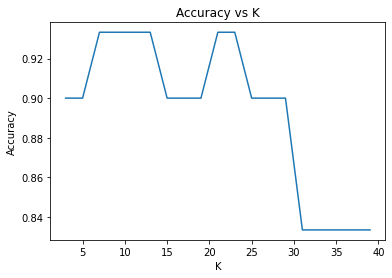

In [12]:
# Problem # (f)
# TODO: Perform classification using kNN with {k | k is all odd numbers in [3, 40]}. 
# Collect all accuracies for different k values, and briefly analyze the results.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

accuracy_list = []
k_list = []
for i in range(3, 40):
    if i%2 == 1:
        k_list.append(i)
        pred = knn_clf(n_X_ts, n_X_tr, Y_tr, i)
        accuracy_list.append(get_accuracy(Y_ts, pred))
plt.title("Accuracy vs K")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.plot(k_list, accuracy_list)

In [16]:
# Problem # (g)
def knn_reg(X_test, X_train, y_train, k=3, distance_metric=euclidean_distance):
    """
    Description: KNN Regression; regress X_test according to (X_train, y_train)
    Input: X_test - test input attributes (list of instances or matrix)
           X_train - training input attributes (list of instances or matrix)
           y_train - training output
           k - k in kNN; #neighbors
           distance_metric - distance metric
    Output: predictions
    """
    """ ---- Beginning of code block (3) ---- """
    ls_neighbors = get_kneighbors(X_test, X_train, k, distance_metric)

    y_pred = np.array([np.mean(y_train[neighbors])for neighbors in ls_neighbors])
    """ ---- End of code block (3) ---- """
    
    return y_pred 

In [17]:
def get_rmse(y_true, y_pred):
    """
    Measures the regression error using root-mean-square error (RMSE)
    Input: Y_true - true output (ground truth)
           Y_pred - predicted output
    return a floating point number representing RMSE
    """

    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean((y_true - y_pred)**2))


In [18]:
# Problem # (h)
# TODO: Write a script that loads insurance_train.csv 
# and insurance_test.csv, respectively as the train and test datasets, 
# and performs regression
data_tr = np.genfromtxt('insurance_train.csv', delimiter=',', skip_header=1)#for training
data_ts = np.genfromtxt('insurance_test.csv', delimiter=',', skip_header=1)#for test

X_tr = data_tr[:, :-1]# 맨 오른쪽 값을 제외하고 모두
Y_tr = data_tr[:, -1].astype(np.int64)
X_ts = data_ts[:, :-1]
Y_ts = data_ts[:, -1].astype(np.int64)
# print(X_tr.shape)
# print(Y_tr.shape)
mu = X_tr.mean(axis=0)
sigma = X_tr.std(axis=0)
n_X_tr ,m, sig= normalize(X_tr, mu, sigma)
n_X_ts, m, sig = normalize(X_ts, mu, sigma)

pred = knn_reg(n_X_ts, n_X_tr, Y_tr, 5)
print("Y_ts : ",Y_ts)
print("pred : ",pred)
print(get_rmse(Y_ts, pred))

Y_ts :  [17361 34472  1972 21232  8627  4433  4438 24915 23241  9957  8269 18767
 36580  8765  5383 12124  2709  3987 12495 26018  8798 35595 42211  1711
  8569  2020 16450 21595  9850  6877 21677 44423  4137 13747 12950 12094
 37484 39725  2250 22493 20234  1704 33475  3161 11394 21880  7325 44501
  3594 39727  8023 14394  9288 25309  3353 10594  8277 17929  2480  4462
  1981 11554 48970  6548  5708  7045  8978  5757 14349 10928 39871 13974
  1909 12096 13204  4562  8551  2102 34672 15161 11884  4454  5855  4076
 15019 19023 10796 11353  9748 10577 41676 11286  3591 33907 11299  4561
 44641  1674 23045  3227 16776 11253  3471 11363 20420 10338  8988 10493
  2904  8605 11512 41949 24180  5312  2396 10807  9222 36124 38282  5693
 34166  8347 46661 18903 40904 14254 10214  5836 14358  1728  8582  3693
 20709  9991 19673 11085  7623  3176  3704 36898  9048  7954 27117  6338
  9630 11289 52590  2261 10791  5979  2203 12235 40941  5630 11015  7228
 39722 14426  2459  3989  7727  5124 18963 

end


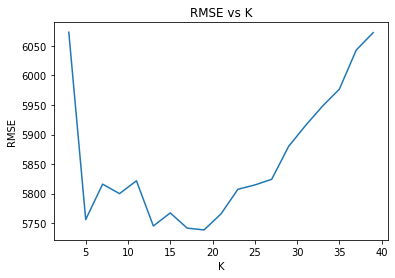

In [19]:
# Problem # (i)
# TODO: Perform regression on the insurance dataset, 
# using kNN with {k | k is all odd numbers in [3, 40]}. 
# Collect all RMSE’s for different k values, and briefly analyze the results.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

error_list = []
k_list = []
for i in range(3, 40):
    if i%2 == 1:
        k_list.append(i)
        pred = knn_reg(n_X_ts, n_X_tr, Y_tr, i)
        error_list.append(get_rmse(Y_ts, pred))
plt.title("RMSE vs K")
plt.ylabel("RMSE")
plt.xlabel("K")
plt.plot(k_list, error_list)
print("end")